In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')
emotion_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Human Emotions Recognition/Dataset/fer2013.csv')
print(emotion_data)

Mounted at /content/drive
       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [4]:
X_train = [] #pixel
y_train = [] #labels
X_test = []
y_test = [] #labels for the testing

In [5]:
for index,row in emotion_data.iterrows():
  k = row['pixels'].split(" ")
  if row['Usage'] == 'Training':
    X_train.append(np.array(k, 'float32'))
    y_train.append(row['emotion'])
  elif row['Usage'] == 'PublicTest':
    X_test.append(np.array(k, 'float32'))
    y_test.append(row['emotion'])

In [6]:
X_train = np.array(X_train, 'float32')
y_train = np.array(y_train, 'float32')
X_test = np.array(X_test, 'float32')
y_test = np.array(y_test, 'float32')

In [7]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train = np_utils.to_categorical(y_train, num_classes=7)
y_test = np_utils.to_categorical(y_test, num_classes=7)

In [8]:
from matplotlib.cbook import flatten
from re import S
model = Sequential()

#first layer
model.add(Conv2D(input_shape=(X_train.shape[1:]), filters=64, kernel_size=(3,3), padding="same", activation="relu"))

#second layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#third layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#fourth layer
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#fifth layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#sixth layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#last layer
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

#output layer
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                    

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, batch_size=32 , epochs=150, verbose=1, validation_data=(X_test, y_test),shuffle=True)


Epoch 1/150
898/898 [==============================] - 41s 45ms/step - loss: 1.7225 - accuracy: 0.2967 - val_loss: 1.5352 - val_accuracy: 0.3957
Epoch 2/150
898/898 [==============================] - 40s 45ms/step - loss: 1.4566 - accuracy: 0.4306 - val_loss: 1.3678 - val_accuracy: 0.4745
Epoch 3/150
898/898 [==============================] - 41s 46ms/step - loss: 1.2971 - accuracy: 0.4978 - val_loss: 1.2736 - val_accuracy: 0.5013
Epoch 4/150
898/898 [==============================] - 43s 47ms/step - loss: 1.1733 - accuracy: 0.5498 - val_loss: 1.2105 - val_accuracy: 0.5366
Epoch 5/150
898/898 [==============================] - 41s 46ms/step - loss: 1.0551 - accuracy: 0.6021 - val_loss: 1.1627 - val_accuracy: 0.5695
Epoch 6/150
898/898 [==============================] - 41s 46ms/step - loss: 0.9224 - accuracy: 0.6557 - val_loss: 1.1571 - val_accuracy: 0.5653
Epoch 7/150
898/898 [==============================] - 41s 46ms/step - loss: 0.7653 - accuracy: 0.7168 - val_loss: 1.1855 - val_ac

In [16]:
loss_and_metrices = model.evaluate(X_test, y_test)
print(loss_and_metrices)

113/113 [==============================] - 2s 15ms/step - loss: 2.9861 - accuracy: 0.5977
[2.9861156940460205, 0.5976595282554626]


In [17]:
#model.save('emotions_30_epochs.h5')
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
  model.save_weights("model.h5")

print("Saved model to disk")

Saved model to disk


1/1 [==============================] - 0s 17ms/step


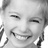



3 = happy
1/1 [==============================] - 0s 16ms/step


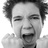



0 = angry
1/1 [==============================] - 0s 16ms/step


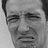



1 = disgust
1/1 [==============================] - 0s 22ms/step


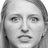



4 = sad
1/1 [==============================] - 0s 19ms/step


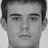



6 = neutral
1/1 [==============================] - 0s 16ms/step


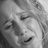



2 = fear


In [21]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras

TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
TYELLOW = '\033[0;43m'

for i in range (1,7):
  img_directory = '/content/drive/MyDrive/Colab Notebooks/Human Emotions Recognition/testing images/' + str(i) + '.jpg'
  img_data = keras.utils.load_img(img_directory, target_size = (48, 48)) #load the image from the directory
  img_data = keras.utils.img_to_array(img_data) #convert the image to a Numpy array
  img_data = tf.image.rgb_to_grayscale(img_data)

  #print(img_data.shape)
  #img_data = np.array(img_data, 'float32')
  #img_data.resize(48,48,1)
  #print(img_data.shape)
  img_data = np.expand_dims(img_data, axis = 0) #expands the array by inserting a new axis at the specified position.
  #print(img_data.shape)

  classify = model.predict(img_data)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  max_index = np.argmax(classify[0])
  emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  emotion_prediction = emotion_detection[max_index]  
  
  if(max_index == 3 or max_index == 5):
    print(TGREEN + str(max_index) + ' = ' +  emotion_prediction)
  elif(max_index == 4 or max_index == 2 or max_index == 0):
    print(TRED + str(max_index) + ' = ' +  emotion_prediction)
  else:
    print(TYELLOW + str(max_index) + ' = ' +  emotion_prediction)

